보통 인공진으은 약한(좁은) 인공지능, 강한(범용)인공지능 ,초 인공지능으로 구분. 약한 인공지능은 추천 시스템, 번역 시세틈 등과 같이 특정 과제에 특화된 인공지능을 ,강한 인공지능은 아직 초기 단계이지만 IBM의 왓슨과 같이 다양한 영역의 과제를 통합저긍로 수행하는 인공지능을, 초 인공지능은 강한 인공지능의 진화된 혀애로 인간보다 훨씬 뛰어난 지능을 가진 인공지능을 말함. 쉬운 예로 ,SF 영화에 등장하는 Skynet, Ultron 등이 초 인공지능에 속함

https://github.com/francis-kang/handson-unsupervised-learning

In [1]:
# pip install fastcluster

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\python.exe -m pip install --upgrade pip' command.


In [2]:
# pip install hdbscan


You should consider upgrading via the 'C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\python.exe -m pip install --upgrade pip' command.



  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached Cython-0.29.24-cp37-cp37m-win_amd64.whl (1.6 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-win_amd64.whl size=586020 sha256=7217ce958dad5eb8a735e07445cfcf0d2fa072e2aac309f5147003f1bcf9f9af
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\73\5f\2f\9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan
  Attempting uninstall: joblib
    Found existing installation: joblib 0.15.1
    Uninstalling joblib-0.15.1:
      Successfully uninstalled joblib-0.15.1


In [5]:
# # 시계열 클러스터링을 수행
# pip install tslearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\python.exe -m pip install --upgrade pip' command.


# 2장 사기 탐지 솔루션 구축

In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl



%matplotlib inline

from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import log_loss ,precision_recall_curve, average_precision_score ,roc_curve, auc, roc_auc_score , confusion_matrix, classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [2]:
# 데이터 수집
current_path = os.getcwd()
file = os.path.sep.join(['', 'datasets', 'credit_card_data', 'creditcard.csv'])
data = pd.read_csv(current_path + file)

In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Tip. 일부 머신러닝 알고리즘은 데이터 스케일링에 매우 민감. 그래서 표준화를 통해 모든 데이터가 동일한 스케일을 갖도록 하는 것은 머신러닝에서 좋은 사례임.

데이터 크기를 조정하기 위한 또 다른 방법은 정규화(normalization)이며 데이터 크기를 0에서 1범위로 다시 변환. 표준화된 데이터와 달리 정규화된 모든 데이터는 양숫값을 가짐.



In [5]:
print("Number of fraudulent transactions:", data['Class'].sum())

Number of fraudulent transactions: 492


In [6]:
nanCounter = np.isnan(data).sum()
nanCounter

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
## 피쳐별 고유값 확인

distinctCounter = data.apply(lambda x : len(x.unique()))
distinctCounter

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

#### 피처 행렬 X 및 레이블 배열 Y 생성.

In [8]:
dataX = data.copy().drop(['Class'], axis= 1)
dataY = data['Class'].copy()



#### 피처 행렬 X 표준화하기

In [9]:
featuresToScale = dataX.drop(['Time'], axis = 1).columns
sX = pp.StandardScaler(copy = True)
dataX.loc[:, featuresToScale] = sX.fit_transform(dataX[featuresToScale])



In [10]:
dataX.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,94813.859575,-8.157366e-16,3.154853e-17,-4.409878e-15,-6.734811e-16,-2.874435e-16,4.168992e-16,-8.767997e-16,-2.423604e-16,3.078727e-16,...,2.754870e-16,1.685077e-17,1.478472e-15,-6.797197e-16,1.234659e-16,-7.659279e-16,3.247603e-16,-2.953495e-18,5.401572e-17,3.202236e-16
std,47488.145955,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,0.000000,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,...,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,54201.500000,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,...,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,84692.000000,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,...,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,139320.500000,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,...,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,172792.000000,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,...,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


In [11]:
featuresToScale

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

### 2.3.4 피처 엔지니어링 및 피처 선택하기

대부분 머신러닝 프로젝트에서 피처 엔지니이렁 및 피처 선택을 핵심 기능의 일부로 고려해야 한다. 피처 엔지니어링에는 새로운 피처를 생성하는 것을 포함. 예를 들면 원본 피처의 비율 또는 갯 ㅜ또는 합계를 생성. 피처 엔지니어링은 머신러닝 학습 알고리즘이 데이터셋으로부터 더 강력한 시그널을 추출할 수 있도록 도움을 준다.

### 피처 간 상관관계 확인

In [12]:
correlationMatrix = pd.DataFrame(data= [], index =dataX.columns, columns = dataX.columns )
for i in dataX.columns:
    for j in dataX.columns:
        correlationMatrix.loc[i,j]  = np.round(pearsonr(dataX.loc[:, i ], dataX.loc[:,j])[0],2)

In [13]:
correlationMatrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,...,-0.05,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01
V1,0.12,1,-0,-0,-0,0,0,0,-0,0,...,0,-0,0,0,-0,-0,-0,0,0,-0.23
V2,-0.01,-0,1,0,-0,0,0,-0,-0,-0,...,0,0,0,0,-0,0,0,-0,-0,-0.53
V3,-0.42,-0,0,1,-0,-0,0,0,-0,0,...,0,-0,-0,-0,0,0,-0,0,0,-0.21
V4,-0.11,-0,-0,-0,1,-0,-0,-0,0,0,...,-0,-0,0,0,0,0,-0,-0,-0,0.1
V5,0.17,0,0,-0,-0,1,0,0,0,0,...,-0,-0,0,0,-0,-0,0,0,-0,-0.39
V6,-0.06,0,0,0,-0,0,1,-0,-0,-0,...,0,-0,-0,0,-0,0,-0,-0,0,0.22
V7,0.08,0,-0,0,-0,0,-0,1,-0,0,...,0,-0,-0,-0,-0,0,-0,-0,0,0.4
V8,-0.04,-0,-0,-0,0,0,-0,-0,1,0,...,0,0,0,0,-0,-0,-0,0,-0,-0.1
V9,-0.01,0,-0,0,0,0,-0,0,0,1,...,-0,0,-0,-0,-0,0,-0,-0,0,-0.04


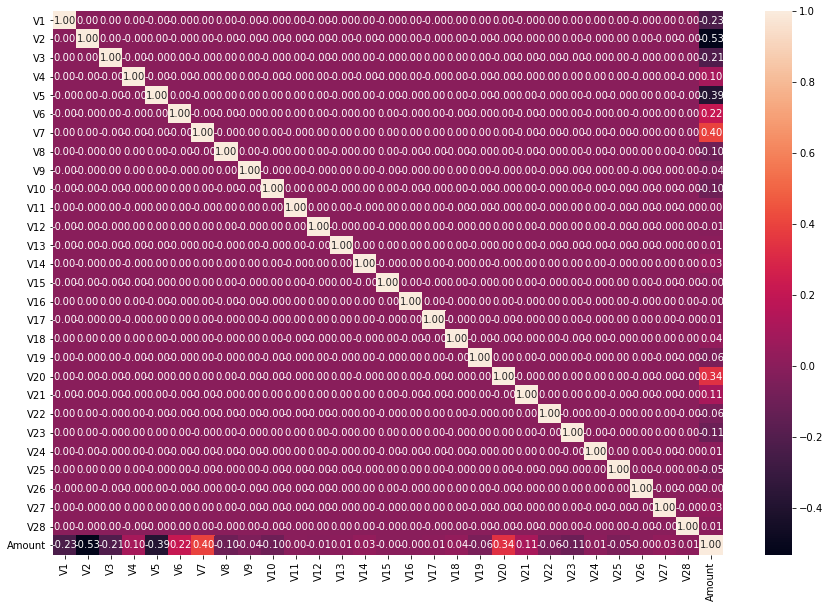

In [14]:
import seaborn as sns
plt.figure(figsize= (15,10))
sns.heatmap(dataX.iloc[:,1:].corr() ,  fmt='.2f',annot=True)

## 2.3.5 데이터 시각화하기

Text(0, 0.5, 'Frequency Percentage')

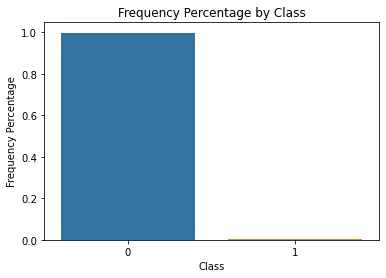

In [15]:
count_classes = pd.value_counts(data['Class'],sort=True).sort_index()
ax = sns.barplot(x=count_classes.index, y=tuple(count_classes/len(data)))
ax.set_title('Frequency Percentage by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency Percentage')

In [16]:
count_classes

0    284315
1       492
Name: Class, dtype: int64

# 2.4 모델 준비하기

## 2.4.1 훈련 및 테스트 데이터셋으로 분할하기

In [17]:
X_train, X_test, y_train, y_test = train_test_split(dataX, 
                                    dataY, test_size=0.33, 
                                    random_state=2018, stratify=dataY)

In [18]:
k_fold = StratifiedKFold(n_splits=5,shuffle=True,random_state=2018)

In [19]:
penalty = 'l2'
C = 1.0
class_weight = 'balanced'
random_state = 2018
solver = 'liblinear'
n_jobs = 1

logReg = LogisticRegression(penalty=penalty, C=C, 
            class_weight=class_weight, random_state=random_state, 
                            solver=solver, n_jobs=n_jobs)

In [20]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data = [], index= y_train.index, columns=[0,1])

model = logReg

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index ,: ], X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index] ,y_train.iloc[cv_index]
    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold, model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index, :] = model.predict_proba(X_cv_fold)
    
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index ,1])
    cvScores.append(loglossCV)
    
    print("Training Log Loss:", loglossTraining)
    print("CV Log Loss :", loglossCV)
    

loglossLogisticRegression = log_loss(y_train, predictionsBasedOnKFolds.loc[:,1])
                                              
print("Logistic Regression Log Loss: ", loglossLogisticRegression)

    
    

Training Log Loss: 0.10966417691559745
CV Log Loss : 0.1087890075738569
Training Log Loss: 0.10456593403651862
CV Log Loss : 0.10403802507871214
Training Log Loss: 0.11543339049989151
CV Log Loss : 0.1176767609762236
Training Log Loss: 0.11552246107932433
CV Log Loss : 0.11810771227630457
Training Log Loss: 0.09710267061641238
CV Log Loss : 0.09698247134407231
Logistic Regression Log Loss:  0.10911879544983391


## 로지스틱 회귀 모델 평가하기 (Precison- recall curve, ROC Curve)

정밀도-재현율 곡선을 그리고 평균 정밀도 계산.

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.73')

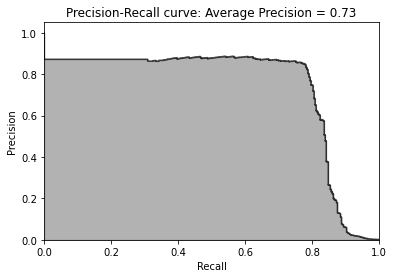

In [21]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()
precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                       preds['prediction'])

average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

Roc-Curve 검사

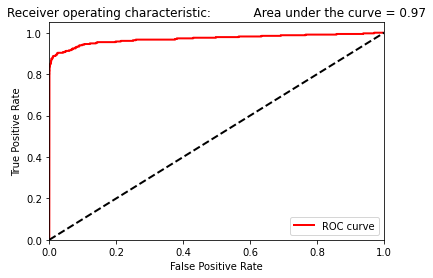

In [23]:
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

# 2.7 머신러닝 모델(2)

## 2.7.1 랜덤 포레스트

In [25]:
n_estimators = 10
max_features = 'auto'
max_depth =None
min_samples_split =2
min_samples_leaf = 1
min_weight_fraction_leaf = 0.0
max_leaf_nodes =None
bootstrap =True
oob_score =False
n_jobs =1 
random_state =2018
class_weight  = 'balanced'


RFC = RandomForestClassifier(n_estimators = n_estimators, 
                            max_features = max_features, max_depth = max_depth,
                            min_samples_split = min_samples_split , min_samples_leaf = min_samples_leaf,
                            min_weight_fraction_leaf =min_weight_fraction_leaf,
                            max_leaf_nodes = max_leaf_nodes, bootstrap = bootstrap,
                            oob_score = oob_score, n_jobs= n_jobs, random_state= random_state,
                            class_weight = class_weight)



In [29]:
# 모델 훈렷ㄴ시키기 5번의 k-겹 교차검증.

trainingScores =[]
scScores = []
predictionBasedOnKFolds = pd.DataFrame(data= [] , index= y_train.index, columns = [0,1])

model =RFC

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:] , X_train.iloc[cv_index ,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index] , y_train.iloc[cv_index]
    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold, model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index, :] = model.predict_proba(X_cv_fold)
    loglossCV= log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index , 1])
    cvScores.append(loglossCV)
    
    
    print("Training Log Loss :", loglossTraining)
    print("CV Log Loss :", loglossCV )
    
loglossRandomForestsClassifier =log_loss(y_train, predictionsBasedOnKFolds.loc[:,1])
    
    
print("Random Forests Log Loss :", loglossRandomForestsClassifier)
    
    

Training Log Loss : 0.0004570758747246713
CV Log Loss : 0.009090797476425144
Training Log Loss : 0.0004101805310493279
CV Log Loss : 0.012640234648018377
Training Log Loss : 0.00040027341363592047
CV Log Loss : 0.009990776910341356
Training Log Loss : 0.0003894650263288808
CV Log Loss : 0.006620007375395402
Training Log Loss : 0.0004291016183715201
CV Log Loss : 0.01348243171548044
Random Forests Log Loss : 0.010364849625132141


In [35]:
trainingScores

[0.0004570758747246713,
 0.0004101805310493279,
 0.00040027341363592047,
 0.0003894650263288808,
 0.0004291016183715201]

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.79')

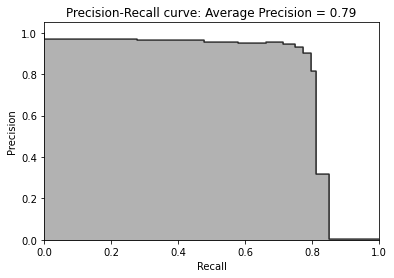

In [36]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()
precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                       preds['prediction'])

average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

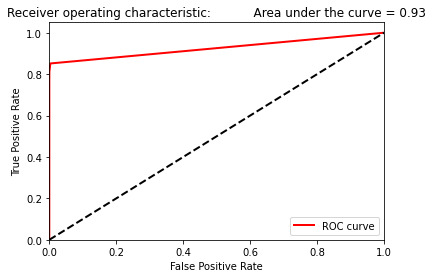

In [37]:
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

## 2.7.2 그레디언트 부스팅 머신(XGBoost)



In [47]:
params_xGB = {
    'nthread':16, # 코어 수
    'learning_rate': 0.3, # 학습률 : 범위 (0 ~ 1) , 디폴트 0.3
    'gamma': 0, # 감마 : 범위 (0 ~ 무한대) , 디폴트 0
        # 이 값이 높으면 복잡성이 감소(편향 증가, 변동 감소) 
    'max_depth': 6, # max_depth : 범위 (1 ~ 무한대) , 디폴트 6 ## 트리의 최대 깊이
    'min_child_weight': 1, # min_child_weight : 범위 (0 ~ 무한대) , 디폴트 1 ## 자식노드에 필요한 가중치의 최소 합계
    'max_delta_step': 0, # max_delta_step : 범위 (0 ~ 무한대) ,  디폴트 0 ## 각 트리의 가중치 추정을 위한 최대 델타 단계
    'subsample': 1.0, # subsample : 범위 (0 ~ 1) , 디폴트 1
        # 훈련 데이터의 샘플링 비율
    'colsample_bytree': 1.0, # colsample_bytree : 범위 (0 ~ 1) , 디폴트 1
        # 훈련 피쳐의 샘플링 비율
    'objective':'binary:logistic',
    'num_class':1,
    'eval_metric':'logloss',
    'seed':2018,
    'silent':1
}

In [48]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                    index=y_train.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    dtrain = xgb.DMatrix(data=X_train_fold, label=y_train_fold)
    dCV = xgb.DMatrix(data=X_cv_fold)
    
    bst = xgb.cv(params_xGB, dtrain, num_boost_round=2000, 
                 nfold=5, early_stopping_rounds=200, verbose_eval=50)
    
    # 수정 사항 : np.arrary 로 재정의 하면서 경고 메세지를 지울 수 있음
    best_rounds = np.argmin(np.array(bst['test-logloss-mean']))
    bst = xgb.train(params_xGB, dtrain, best_rounds)
    
    loglossTraining = log_loss(y_train_fold, bst.predict(dtrain))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'] = \
        bst.predict(dCV)
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossXGBoostGradientBoosting = \
    log_loss(y_train, predictionsBasedOnKFolds.loc[:,'prediction'])
print('XGBoost Gradient Boosting Log Loss: ', loglossXGBoostGradientBoosting)

[10:52:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:52:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:52:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindi

KeyboardInterrupt: 

In [49]:
params_lightGB = {
    'task': 'train',
    'application':'binary',
    'num_class':1,
    'boosting': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'metric_freq':50,
    'is_training_metric':False,
    'max_depth':4,
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'bagging_seed': 2018,
    'verbose': 0,
    'num_threads':16
}

In [51]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                index=y_train.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    lgb_train = lgb.Dataset(X_train_fold, y_train_fold)
    lgb_eval = lgb.Dataset(X_cv_fold, y_cv_fold, reference=lgb_train)
    gbm = lgb.train(params_lightGB, lgb_train, num_boost_round=2000,
                   valid_sets=lgb_eval, early_stopping_rounds=200)
    
    loglossTraining = log_loss(y_train_fold, \
                gbm.predict(X_train_fold, num_iteration=gbm.best_iteration))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'] = \
        gbm.predict(X_cv_fold, num_iteration=gbm.best_iteration) 
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossLightGBMGradientBoosting = \
    log_loss(y_train, predictionsBasedOnKFolds.loc[:,'prediction'])
print('LightGBM Gradient Boosting Log Loss: ', loglossLightGBMGradientBoosting)

[1]	valid_0's binary_logloss: 0.00634115
Training until validation scores don't improve for 200 rounds
[2]	valid_0's binary_logloss: 0.00627492
[3]	valid_0's binary_logloss: 0.00620527
[4]	valid_0's binary_logloss: 0.00616014
[5]	valid_0's binary_logloss: 0.00609608
[6]	valid_0's binary_logloss: 0.0060474
[7]	valid_0's binary_logloss: 0.0059922
[8]	valid_0's binary_logloss: 0.00593688
[9]	valid_0's binary_logloss: 0.00588275
[10]	valid_0's binary_logloss: 0.00582962
[11]	valid_0's binary_logloss: 0.00577838
[12]	valid_0's binary_logloss: 0.00573037
[13]	valid_0's binary_logloss: 0.00568343
[14]	valid_0's binary_logloss: 0.00563845
[15]	valid_0's binary_logloss: 0.00559177
[16]	valid_0's binary_logloss: 0.00554777
[17]	valid_0's binary_logloss: 0.00550471
[18]	valid_0's binary_logloss: 0.00546175
[19]	valid_0's binary_logloss: 0.00542175
[20]	valid_0's binary_logloss: 0.00538166
[21]	valid_0's binary_logloss: 0.00534326
[22]	valid_0's binary_logloss: 0.00530349
[23]	valid_0's binary_log

[208]	valid_0's binary_logloss: 0.00300537
[209]	valid_0's binary_logloss: 0.00300409
[210]	valid_0's binary_logloss: 0.00299942
[211]	valid_0's binary_logloss: 0.00299826
[212]	valid_0's binary_logloss: 0.00299417
[213]	valid_0's binary_logloss: 0.00299162
[214]	valid_0's binary_logloss: 0.00299028
[215]	valid_0's binary_logloss: 0.00298514
[216]	valid_0's binary_logloss: 0.00298262
[217]	valid_0's binary_logloss: 0.00298179
[218]	valid_0's binary_logloss: 0.00297867
[219]	valid_0's binary_logloss: 0.00297626
[220]	valid_0's binary_logloss: 0.0029754
[221]	valid_0's binary_logloss: 0.00297057
[222]	valid_0's binary_logloss: 0.00296827
[223]	valid_0's binary_logloss: 0.00296446
[224]	valid_0's binary_logloss: 0.00296214
[225]	valid_0's binary_logloss: 0.00296092
[226]	valid_0's binary_logloss: 0.00295794
[227]	valid_0's binary_logloss: 0.00295576
[228]	valid_0's binary_logloss: 0.00295504
[229]	valid_0's binary_logloss: 0.00295054
[230]	valid_0's binary_logloss: 0.00294705
[231]	valid_

[411]	valid_0's binary_logloss: 0.00272406
[412]	valid_0's binary_logloss: 0.00272231
[413]	valid_0's binary_logloss: 0.00271983
[414]	valid_0's binary_logloss: 0.00271813
[415]	valid_0's binary_logloss: 0.0027186
[416]	valid_0's binary_logloss: 0.00271696
[417]	valid_0's binary_logloss: 0.00271746
[418]	valid_0's binary_logloss: 0.00271794
[419]	valid_0's binary_logloss: 0.00271667
[420]	valid_0's binary_logloss: 0.00271565
[421]	valid_0's binary_logloss: 0.00271503
[422]	valid_0's binary_logloss: 0.00271432
[423]	valid_0's binary_logloss: 0.00271277
[424]	valid_0's binary_logloss: 0.00271109
[425]	valid_0's binary_logloss: 0.00271079
[426]	valid_0's binary_logloss: 0.00270981
[427]	valid_0's binary_logloss: 0.00270816
[428]	valid_0's binary_logloss: 0.00270757
[429]	valid_0's binary_logloss: 0.00270639
[430]	valid_0's binary_logloss: 0.0027069
[431]	valid_0's binary_logloss: 0.00270594
[432]	valid_0's binary_logloss: 0.00270655
[433]	valid_0's binary_logloss: 0.00270498
[434]	valid_0

[606]	valid_0's binary_logloss: 0.00265646
[607]	valid_0's binary_logloss: 0.00265761
[608]	valid_0's binary_logloss: 0.00265776
[609]	valid_0's binary_logloss: 0.00265748
[610]	valid_0's binary_logloss: 0.00265684
[611]	valid_0's binary_logloss: 0.00265653
[612]	valid_0's binary_logloss: 0.00265505
[613]	valid_0's binary_logloss: 0.00265535
[614]	valid_0's binary_logloss: 0.00265532
[615]	valid_0's binary_logloss: 0.00265424
[616]	valid_0's binary_logloss: 0.00265483
[617]	valid_0's binary_logloss: 0.00265466
[618]	valid_0's binary_logloss: 0.00265439
[619]	valid_0's binary_logloss: 0.00265469
[620]	valid_0's binary_logloss: 0.00265469
[621]	valid_0's binary_logloss: 0.00265528
[622]	valid_0's binary_logloss: 0.00265461
[623]	valid_0's binary_logloss: 0.00265445
[624]	valid_0's binary_logloss: 0.00265446
[625]	valid_0's binary_logloss: 0.00265416
[626]	valid_0's binary_logloss: 0.00265446
[627]	valid_0's binary_logloss: 0.00265462
[628]	valid_0's binary_logloss: 0.00265428
[629]	valid

[799]	valid_0's binary_logloss: 0.00264074
[800]	valid_0's binary_logloss: 0.00264105
[801]	valid_0's binary_logloss: 0.00263951
[802]	valid_0's binary_logloss: 0.00263878
[803]	valid_0's binary_logloss: 0.00263893
[804]	valid_0's binary_logloss: 0.00263878
[805]	valid_0's binary_logloss: 0.00263877
[806]	valid_0's binary_logloss: 0.00263907
[807]	valid_0's binary_logloss: 0.00263839
[808]	valid_0's binary_logloss: 0.00263744
[809]	valid_0's binary_logloss: 0.00263723
[810]	valid_0's binary_logloss: 0.00263768
[811]	valid_0's binary_logloss: 0.0026378
[812]	valid_0's binary_logloss: 0.0026371
[813]	valid_0's binary_logloss: 0.00263694
[814]	valid_0's binary_logloss: 0.00263682
[815]	valid_0's binary_logloss: 0.00263688
[816]	valid_0's binary_logloss: 0.002637
[817]	valid_0's binary_logloss: 0.00263728
[818]	valid_0's binary_logloss: 0.00263659
[819]	valid_0's binary_logloss: 0.00263668
[820]	valid_0's binary_logloss: 0.00263594
[821]	valid_0's binary_logloss: 0.00263626
[822]	valid_0's

[998]	valid_0's binary_logloss: 0.00261106
[999]	valid_0's binary_logloss: 0.00261171
[1000]	valid_0's binary_logloss: 0.00261147
[1001]	valid_0's binary_logloss: 0.00261011
[1002]	valid_0's binary_logloss: 0.00261022
[1003]	valid_0's binary_logloss: 0.00260972
[1004]	valid_0's binary_logloss: 0.00261011
[1005]	valid_0's binary_logloss: 0.00260992
[1006]	valid_0's binary_logloss: 0.00261056
[1007]	valid_0's binary_logloss: 0.00261002
[1008]	valid_0's binary_logloss: 0.0026101
[1009]	valid_0's binary_logloss: 0.00261017
[1010]	valid_0's binary_logloss: 0.00260975
[1011]	valid_0's binary_logloss: 0.00260982
[1012]	valid_0's binary_logloss: 0.00260961
[1013]	valid_0's binary_logloss: 0.00260972
[1014]	valid_0's binary_logloss: 0.00260908
[1015]	valid_0's binary_logloss: 0.0026093
[1016]	valid_0's binary_logloss: 0.00260857
[1017]	valid_0's binary_logloss: 0.00260923
[1018]	valid_0's binary_logloss: 0.00260883
[1019]	valid_0's binary_logloss: 0.00260949
[1020]	valid_0's binary_logloss: 0.0

[1195]	valid_0's binary_logloss: 0.00262299
[1196]	valid_0's binary_logloss: 0.00262256
[1197]	valid_0's binary_logloss: 0.00262314
[1198]	valid_0's binary_logloss: 0.00262252
[1199]	valid_0's binary_logloss: 0.00262222
[1200]	valid_0's binary_logloss: 0.00262224
[1201]	valid_0's binary_logloss: 0.00262214
[1202]	valid_0's binary_logloss: 0.00262146
[1203]	valid_0's binary_logloss: 0.00262205
[1204]	valid_0's binary_logloss: 0.00262282
[1205]	valid_0's binary_logloss: 0.00262267
[1206]	valid_0's binary_logloss: 0.00262239
[1207]	valid_0's binary_logloss: 0.00262217
[1208]	valid_0's binary_logloss: 0.00262181
[1209]	valid_0's binary_logloss: 0.00262167
[1210]	valid_0's binary_logloss: 0.00262237
[1211]	valid_0's binary_logloss: 0.00262206
[1212]	valid_0's binary_logloss: 0.00262265
[1213]	valid_0's binary_logloss: 0.00262282
[1214]	valid_0's binary_logloss: 0.00262258
[1215]	valid_0's binary_logloss: 0.00262245
[1216]	valid_0's binary_logloss: 0.00262353
Early stopping, best iteration i

[171]	valid_0's binary_logloss: 0.00331132
[172]	valid_0's binary_logloss: 0.00330756
[173]	valid_0's binary_logloss: 0.00330377
[174]	valid_0's binary_logloss: 0.0032997
[175]	valid_0's binary_logloss: 0.00329614
[176]	valid_0's binary_logloss: 0.00329162
[177]	valid_0's binary_logloss: 0.00328756
[178]	valid_0's binary_logloss: 0.00328345
[179]	valid_0's binary_logloss: 0.00328048
[180]	valid_0's binary_logloss: 0.00327662
[181]	valid_0's binary_logloss: 0.00327328
[182]	valid_0's binary_logloss: 0.00327036
[183]	valid_0's binary_logloss: 0.00326674
[184]	valid_0's binary_logloss: 0.00326191
[185]	valid_0's binary_logloss: 0.0032576
[186]	valid_0's binary_logloss: 0.00325398
[187]	valid_0's binary_logloss: 0.00324998
[188]	valid_0's binary_logloss: 0.00324663
[189]	valid_0's binary_logloss: 0.0032432
[190]	valid_0's binary_logloss: 0.00323895
[191]	valid_0's binary_logloss: 0.00323603
[192]	valid_0's binary_logloss: 0.00323202
[193]	valid_0's binary_logloss: 0.00322778
[194]	valid_0'

[370]	valid_0's binary_logloss: 0.00297757
[371]	valid_0's binary_logloss: 0.00297619
[372]	valid_0's binary_logloss: 0.00297632
[373]	valid_0's binary_logloss: 0.00297613
[374]	valid_0's binary_logloss: 0.00297578
[375]	valid_0's binary_logloss: 0.00297556
[376]	valid_0's binary_logloss: 0.00297534
[377]	valid_0's binary_logloss: 0.00297429
[378]	valid_0's binary_logloss: 0.00297454
[379]	valid_0's binary_logloss: 0.0029744
[380]	valid_0's binary_logloss: 0.00297469
[381]	valid_0's binary_logloss: 0.00297489
[382]	valid_0's binary_logloss: 0.00297482
[383]	valid_0's binary_logloss: 0.00297463
[384]	valid_0's binary_logloss: 0.00297443
[385]	valid_0's binary_logloss: 0.00297432
[386]	valid_0's binary_logloss: 0.00297241
[387]	valid_0's binary_logloss: 0.00297129
[388]	valid_0's binary_logloss: 0.00297158
[389]	valid_0's binary_logloss: 0.00297255
[390]	valid_0's binary_logloss: 0.00297198
[391]	valid_0's binary_logloss: 0.00297196
[392]	valid_0's binary_logloss: 0.00297126
[393]	valid_

[567]	valid_0's binary_logloss: 0.00292507
[568]	valid_0's binary_logloss: 0.00292477
[569]	valid_0's binary_logloss: 0.00292337
[570]	valid_0's binary_logloss: 0.00292338
[571]	valid_0's binary_logloss: 0.0029243
[572]	valid_0's binary_logloss: 0.00292366
[573]	valid_0's binary_logloss: 0.00292316
[574]	valid_0's binary_logloss: 0.00292489
[575]	valid_0's binary_logloss: 0.00292465
[576]	valid_0's binary_logloss: 0.00292415
[577]	valid_0's binary_logloss: 0.00292523
[578]	valid_0's binary_logloss: 0.00292528
[579]	valid_0's binary_logloss: 0.00292515
[580]	valid_0's binary_logloss: 0.00292486
[581]	valid_0's binary_logloss: 0.00292603
[582]	valid_0's binary_logloss: 0.00292552
[583]	valid_0's binary_logloss: 0.00292682
[584]	valid_0's binary_logloss: 0.00292622
[585]	valid_0's binary_logloss: 0.00292614
[586]	valid_0's binary_logloss: 0.00292602
[587]	valid_0's binary_logloss: 0.00292647
[588]	valid_0's binary_logloss: 0.00292689
[589]	valid_0's binary_logloss: 0.00292776
[590]	valid_

[760]	valid_0's binary_logloss: 0.00292214
[761]	valid_0's binary_logloss: 0.00292204
[762]	valid_0's binary_logloss: 0.00292275
[763]	valid_0's binary_logloss: 0.00292198
[764]	valid_0's binary_logloss: 0.00292232
[765]	valid_0's binary_logloss: 0.00292214
[766]	valid_0's binary_logloss: 0.00292319
[767]	valid_0's binary_logloss: 0.00292357
[768]	valid_0's binary_logloss: 0.00292322
[769]	valid_0's binary_logloss: 0.00292304
[770]	valid_0's binary_logloss: 0.00292292
[771]	valid_0's binary_logloss: 0.0029233
[772]	valid_0's binary_logloss: 0.00292434
[773]	valid_0's binary_logloss: 0.00292533
[774]	valid_0's binary_logloss: 0.00292638
[775]	valid_0's binary_logloss: 0.00292544
[776]	valid_0's binary_logloss: 0.00292577
[777]	valid_0's binary_logloss: 0.00292509
[778]	valid_0's binary_logloss: 0.00292508
[779]	valid_0's binary_logloss: 0.00292581
[780]	valid_0's binary_logloss: 0.0029263
[781]	valid_0's binary_logloss: 0.00292591
[782]	valid_0's binary_logloss: 0.00292697
[783]	valid_0

[1]	valid_0's binary_logloss: 0.00598384
Training until validation scores don't improve for 200 rounds
[2]	valid_0's binary_logloss: 0.00591096
[3]	valid_0's binary_logloss: 0.00582392
[4]	valid_0's binary_logloss: 0.00574865
[5]	valid_0's binary_logloss: 0.00567836
[6]	valid_0's binary_logloss: 0.00559443
[7]	valid_0's binary_logloss: 0.00550457
[8]	valid_0's binary_logloss: 0.00544018
[9]	valid_0's binary_logloss: 0.00536756
[10]	valid_0's binary_logloss: 0.0053157
[11]	valid_0's binary_logloss: 0.00526181
[12]	valid_0's binary_logloss: 0.00520665
[13]	valid_0's binary_logloss: 0.00515495
[14]	valid_0's binary_logloss: 0.00511009
[15]	valid_0's binary_logloss: 0.00506738
[16]	valid_0's binary_logloss: 0.00502552
[17]	valid_0's binary_logloss: 0.00497765
[18]	valid_0's binary_logloss: 0.00493184
[19]	valid_0's binary_logloss: 0.00488708
[20]	valid_0's binary_logloss: 0.00484414
[21]	valid_0's binary_logloss: 0.00480165
[22]	valid_0's binary_logloss: 0.00475938
[23]	valid_0's binary_lo

[208]	valid_0's binary_logloss: 0.00259988
[209]	valid_0's binary_logloss: 0.00259801
[210]	valid_0's binary_logloss: 0.00259565
[211]	valid_0's binary_logloss: 0.00259213
[212]	valid_0's binary_logloss: 0.00259003
[213]	valid_0's binary_logloss: 0.00258814
[214]	valid_0's binary_logloss: 0.00258542
[215]	valid_0's binary_logloss: 0.00258107
[216]	valid_0's binary_logloss: 0.00257903
[217]	valid_0's binary_logloss: 0.00257602
[218]	valid_0's binary_logloss: 0.00257377
[219]	valid_0's binary_logloss: 0.00257211
[220]	valid_0's binary_logloss: 0.00256995
[221]	valid_0's binary_logloss: 0.0025658
[222]	valid_0's binary_logloss: 0.00256298
[223]	valid_0's binary_logloss: 0.00256132
[224]	valid_0's binary_logloss: 0.00255915
[225]	valid_0's binary_logloss: 0.00255646
[226]	valid_0's binary_logloss: 0.00255458
[227]	valid_0's binary_logloss: 0.00255275
[228]	valid_0's binary_logloss: 0.00255015
[229]	valid_0's binary_logloss: 0.00254905
[230]	valid_0's binary_logloss: 0.00254764
[231]	valid_

[405]	valid_0's binary_logloss: 0.00238358
[406]	valid_0's binary_logloss: 0.00238289
[407]	valid_0's binary_logloss: 0.00238281
[408]	valid_0's binary_logloss: 0.00238194
[409]	valid_0's binary_logloss: 0.00238158
[410]	valid_0's binary_logloss: 0.00238141
[411]	valid_0's binary_logloss: 0.00238081
[412]	valid_0's binary_logloss: 0.00237998
[413]	valid_0's binary_logloss: 0.00237985
[414]	valid_0's binary_logloss: 0.00237928
[415]	valid_0's binary_logloss: 0.00237865
[416]	valid_0's binary_logloss: 0.00237852
[417]	valid_0's binary_logloss: 0.00237798
[418]	valid_0's binary_logloss: 0.00237786
[419]	valid_0's binary_logloss: 0.00237782
[420]	valid_0's binary_logloss: 0.0023772
[421]	valid_0's binary_logloss: 0.00237756
[422]	valid_0's binary_logloss: 0.00237739
[423]	valid_0's binary_logloss: 0.00237755
[424]	valid_0's binary_logloss: 0.00237678
[425]	valid_0's binary_logloss: 0.00237657
[426]	valid_0's binary_logloss: 0.00237609
[427]	valid_0's binary_logloss: 0.00237598
[428]	valid_

[599]	valid_0's binary_logloss: 0.00231432
[600]	valid_0's binary_logloss: 0.00231458
[601]	valid_0's binary_logloss: 0.00231457
[602]	valid_0's binary_logloss: 0.00231361
[603]	valid_0's binary_logloss: 0.0023136
[604]	valid_0's binary_logloss: 0.00231336
[605]	valid_0's binary_logloss: 0.00231378
[606]	valid_0's binary_logloss: 0.00231389
[607]	valid_0's binary_logloss: 0.00231295
[608]	valid_0's binary_logloss: 0.00231298
[609]	valid_0's binary_logloss: 0.00231279
[610]	valid_0's binary_logloss: 0.00231272
[611]	valid_0's binary_logloss: 0.00231315
[612]	valid_0's binary_logloss: 0.00231215
[613]	valid_0's binary_logloss: 0.00231222
[614]	valid_0's binary_logloss: 0.00231133
[615]	valid_0's binary_logloss: 0.00231144
[616]	valid_0's binary_logloss: 0.00231139
[617]	valid_0's binary_logloss: 0.0023114
[618]	valid_0's binary_logloss: 0.00231214
[619]	valid_0's binary_logloss: 0.00231327
[620]	valid_0's binary_logloss: 0.0023126
[621]	valid_0's binary_logloss: 0.00231239
[622]	valid_0'

[799]	valid_0's binary_logloss: 0.00230374
[800]	valid_0's binary_logloss: 0.0023037
[801]	valid_0's binary_logloss: 0.00230284
[802]	valid_0's binary_logloss: 0.00230324
[803]	valid_0's binary_logloss: 0.00230416
[804]	valid_0's binary_logloss: 0.00230405
[805]	valid_0's binary_logloss: 0.00230352
[806]	valid_0's binary_logloss: 0.00230398
[807]	valid_0's binary_logloss: 0.00230514
[808]	valid_0's binary_logloss: 0.00230488
[809]	valid_0's binary_logloss: 0.00230531
[810]	valid_0's binary_logloss: 0.00230649
[811]	valid_0's binary_logloss: 0.0023059
[812]	valid_0's binary_logloss: 0.00230592
[813]	valid_0's binary_logloss: 0.00230638
[814]	valid_0's binary_logloss: 0.00230734
[815]	valid_0's binary_logloss: 0.00230762
[816]	valid_0's binary_logloss: 0.0023081
[817]	valid_0's binary_logloss: 0.00230863
[818]	valid_0's binary_logloss: 0.00230791
[819]	valid_0's binary_logloss: 0.00230875
[820]	valid_0's binary_logloss: 0.00230908
[821]	valid_0's binary_logloss: 0.0023096
[822]	valid_0's

[997]	valid_0's binary_logloss: 0.00231724
[998]	valid_0's binary_logloss: 0.00231805
[999]	valid_0's binary_logloss: 0.00231799
[1000]	valid_0's binary_logloss: 0.00231773
[1001]	valid_0's binary_logloss: 0.00231853
Early stopping, best iteration is:
[801]	valid_0's binary_logloss: 0.00230284
Training Log Loss:  0.0005303100840936764
CV Log Loss:  0.0023028376768372432
[1]	valid_0's binary_logloss: 0.00626824
Training until validation scores don't improve for 200 rounds
[2]	valid_0's binary_logloss: 0.0061933
[3]	valid_0's binary_logloss: 0.00612433
[4]	valid_0's binary_logloss: 0.00604336
[5]	valid_0's binary_logloss: 0.00598282
[6]	valid_0's binary_logloss: 0.00593137
[7]	valid_0's binary_logloss: 0.00587492
[8]	valid_0's binary_logloss: 0.00580743
[9]	valid_0's binary_logloss: 0.00575981
[10]	valid_0's binary_logloss: 0.0057057
[11]	valid_0's binary_logloss: 0.00565854
[12]	valid_0's binary_logloss: 0.00561002
[13]	valid_0's binary_logloss: 0.00556022
[14]	valid_0's binary_logloss:

[185]	valid_0's binary_logloss: 0.00304191
[186]	valid_0's binary_logloss: 0.00303696
[187]	valid_0's binary_logloss: 0.00303351
[188]	valid_0's binary_logloss: 0.00302923
[189]	valid_0's binary_logloss: 0.00302595
[190]	valid_0's binary_logloss: 0.00302183
[191]	valid_0's binary_logloss: 0.00301822
[192]	valid_0's binary_logloss: 0.00301444
[193]	valid_0's binary_logloss: 0.00301182
[194]	valid_0's binary_logloss: 0.00300805
[195]	valid_0's binary_logloss: 0.00300332
[196]	valid_0's binary_logloss: 0.00300063
[197]	valid_0's binary_logloss: 0.0029974
[198]	valid_0's binary_logloss: 0.00299452
[199]	valid_0's binary_logloss: 0.00299001
[200]	valid_0's binary_logloss: 0.00298526
[201]	valid_0's binary_logloss: 0.00298341
[202]	valid_0's binary_logloss: 0.00298036
[203]	valid_0's binary_logloss: 0.00297732
[204]	valid_0's binary_logloss: 0.00297473
[205]	valid_0's binary_logloss: 0.00297277
[206]	valid_0's binary_logloss: 0.00297067
[207]	valid_0's binary_logloss: 0.00296825
[208]	valid_

[376]	valid_0's binary_logloss: 0.00272082
[377]	valid_0's binary_logloss: 0.00272069
[378]	valid_0's binary_logloss: 0.00272122
[379]	valid_0's binary_logloss: 0.00272075
[380]	valid_0's binary_logloss: 0.00272102
[381]	valid_0's binary_logloss: 0.0027214
[382]	valid_0's binary_logloss: 0.00272124
[383]	valid_0's binary_logloss: 0.0027208
[384]	valid_0's binary_logloss: 0.00272065
[385]	valid_0's binary_logloss: 0.00271846
[386]	valid_0's binary_logloss: 0.00271875
[387]	valid_0's binary_logloss: 0.0027186
[388]	valid_0's binary_logloss: 0.0027189
[389]	valid_0's binary_logloss: 0.00271892
[390]	valid_0's binary_logloss: 0.00271879
[391]	valid_0's binary_logloss: 0.00271959
[392]	valid_0's binary_logloss: 0.00271962
[393]	valid_0's binary_logloss: 0.00271946
[394]	valid_0's binary_logloss: 0.00271837
[395]	valid_0's binary_logloss: 0.00271799
[396]	valid_0's binary_logloss: 0.00271802
[397]	valid_0's binary_logloss: 0.00271807
[398]	valid_0's binary_logloss: 0.00271681
[399]	valid_0's

[578]	valid_0's binary_logloss: 0.00272238
[579]	valid_0's binary_logloss: 0.00272175
[580]	valid_0's binary_logloss: 0.00272146
[581]	valid_0's binary_logloss: 0.00272191
[582]	valid_0's binary_logloss: 0.00272139
[583]	valid_0's binary_logloss: 0.00272174
[584]	valid_0's binary_logloss: 0.00272183
[585]	valid_0's binary_logloss: 0.00272229
[586]	valid_0's binary_logloss: 0.00272302
[587]	valid_0's binary_logloss: 0.00272377
[588]	valid_0's binary_logloss: 0.00272391
[589]	valid_0's binary_logloss: 0.00272416
[590]	valid_0's binary_logloss: 0.00272526
[591]	valid_0's binary_logloss: 0.00272605
[592]	valid_0's binary_logloss: 0.00272674
[593]	valid_0's binary_logloss: 0.00272687
[594]	valid_0's binary_logloss: 0.00272686
[595]	valid_0's binary_logloss: 0.00272731
[596]	valid_0's binary_logloss: 0.00272705
[597]	valid_0's binary_logloss: 0.00272698
[598]	valid_0's binary_logloss: 0.00272649
[599]	valid_0's binary_logloss: 0.00272699
[600]	valid_0's binary_logloss: 0.0027262
[601]	valid_

[60]	valid_0's binary_logloss: 0.00480916
[61]	valid_0's binary_logloss: 0.00479491
[62]	valid_0's binary_logloss: 0.00477689
[63]	valid_0's binary_logloss: 0.00476068
[64]	valid_0's binary_logloss: 0.00474398
[65]	valid_0's binary_logloss: 0.00472835
[66]	valid_0's binary_logloss: 0.00471235
[67]	valid_0's binary_logloss: 0.00469623
[68]	valid_0's binary_logloss: 0.00468345
[69]	valid_0's binary_logloss: 0.00466648
[70]	valid_0's binary_logloss: 0.00465201
[71]	valid_0's binary_logloss: 0.00463967
[72]	valid_0's binary_logloss: 0.00462531
[73]	valid_0's binary_logloss: 0.00461107
[74]	valid_0's binary_logloss: 0.00459917
[75]	valid_0's binary_logloss: 0.00458543
[76]	valid_0's binary_logloss: 0.004574
[77]	valid_0's binary_logloss: 0.00456025
[78]	valid_0's binary_logloss: 0.00454706
[79]	valid_0's binary_logloss: 0.0045354
[80]	valid_0's binary_logloss: 0.00452259
[81]	valid_0's binary_logloss: 0.00450857
[82]	valid_0's binary_logloss: 0.00449694
[83]	valid_0's binary_logloss: 0.0044

[253]	valid_0's binary_logloss: 0.00374606
[254]	valid_0's binary_logloss: 0.00374413
[255]	valid_0's binary_logloss: 0.00374364
[256]	valid_0's binary_logloss: 0.00374393
[257]	valid_0's binary_logloss: 0.00374117
[258]	valid_0's binary_logloss: 0.00373933
[259]	valid_0's binary_logloss: 0.00373903
[260]	valid_0's binary_logloss: 0.00373675
[261]	valid_0's binary_logloss: 0.0037348
[262]	valid_0's binary_logloss: 0.00373457
[263]	valid_0's binary_logloss: 0.00373408
[264]	valid_0's binary_logloss: 0.00373256
[265]	valid_0's binary_logloss: 0.00372968
[266]	valid_0's binary_logloss: 0.00372918
[267]	valid_0's binary_logloss: 0.00372692
[268]	valid_0's binary_logloss: 0.00372472
[269]	valid_0's binary_logloss: 0.00372428
[270]	valid_0's binary_logloss: 0.00372438
[271]	valid_0's binary_logloss: 0.00372168
[272]	valid_0's binary_logloss: 0.00372032
[273]	valid_0's binary_logloss: 0.0037196
[274]	valid_0's binary_logloss: 0.00371962
[275]	valid_0's binary_logloss: 0.00371699
[276]	valid_0

[452]	valid_0's binary_logloss: 0.00361224
[453]	valid_0's binary_logloss: 0.0036111
[454]	valid_0's binary_logloss: 0.00361129
[455]	valid_0's binary_logloss: 0.00361046
[456]	valid_0's binary_logloss: 0.00360947
[457]	valid_0's binary_logloss: 0.00361018
[458]	valid_0's binary_logloss: 0.00361096
[459]	valid_0's binary_logloss: 0.00361102
[460]	valid_0's binary_logloss: 0.00360993
[461]	valid_0's binary_logloss: 0.00360934
[462]	valid_0's binary_logloss: 0.00360826
[463]	valid_0's binary_logloss: 0.00360816
[464]	valid_0's binary_logloss: 0.00360763
[465]	valid_0's binary_logloss: 0.00360683
[466]	valid_0's binary_logloss: 0.00360688
[467]	valid_0's binary_logloss: 0.00360707
[468]	valid_0's binary_logloss: 0.00360699
[469]	valid_0's binary_logloss: 0.00360554
[470]	valid_0's binary_logloss: 0.00360612
[471]	valid_0's binary_logloss: 0.00360632
[472]	valid_0's binary_logloss: 0.00360581
[473]	valid_0's binary_logloss: 0.00360558
[474]	valid_0's binary_logloss: 0.00360417
[475]	valid_

[650]	valid_0's binary_logloss: 0.00358691
[651]	valid_0's binary_logloss: 0.00358554
[652]	valid_0's binary_logloss: 0.00358495
[653]	valid_0's binary_logloss: 0.00358627
[654]	valid_0's binary_logloss: 0.00358673
[655]	valid_0's binary_logloss: 0.00358614
[656]	valid_0's binary_logloss: 0.00358614
[657]	valid_0's binary_logloss: 0.00358511
[658]	valid_0's binary_logloss: 0.00358468
[659]	valid_0's binary_logloss: 0.00358472
[660]	valid_0's binary_logloss: 0.00358606
[661]	valid_0's binary_logloss: 0.00358595
[662]	valid_0's binary_logloss: 0.00358538
[663]	valid_0's binary_logloss: 0.00358618
[664]	valid_0's binary_logloss: 0.00358545
[665]	valid_0's binary_logloss: 0.00358524
[666]	valid_0's binary_logloss: 0.00358564
[667]	valid_0's binary_logloss: 0.00358508
[668]	valid_0's binary_logloss: 0.00358524
[669]	valid_0's binary_logloss: 0.00358525
[670]	valid_0's binary_logloss: 0.00358457
[671]	valid_0's binary_logloss: 0.00358385
[672]	valid_0's binary_logloss: 0.00358343
[673]	valid

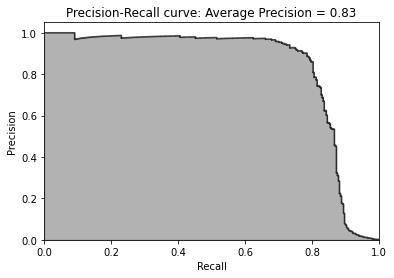

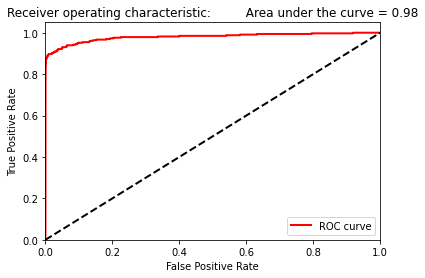

In [52]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsXGBoostGradientBoosting = preds.copy()

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
        Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

### PCA로 데이터 분리해서 시각화하기

In [ ]:
def scatterPlot(xDF, yDF ,algoName):
    tempDF =pd.DataFrame(data= xDF.loc[:,0:1],index= xDF.index)
    tempDF = pd.concat((tempDF, yDF) , axis = 1, join='inner')
    tempDF.columns = ['First Vector','Second Vector' ,"Label"]
    sns.Implot(x ='First Vector', y='Second Vector' , hue = 'Label' , data =tempDF ,fit_reg =False)
    ax = plt.gca()
    ax.set_title("Separation ")